# Chalchitra Talks Book Recommendations

## Library/Package Import

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/chalchitra-talks-book-recommendations/guests.csv
/kaggle/input/chalchitra-talks-book-recommendations/books.csv
/kaggle/input/chalchitra-talks-book-recommendations/recommendations.csv


## Business Understanding

**Tujuan**

Membuat sistem yang dapat merekomendasikan buku kepada pengguna (dalam konteks ini, "pengguna" bisa jadi adalah tamu lain, atau audiens Chalchitra Talks yang mencari rekomendasi).
Menyediakan dua jenis rekomendasi:
- **Content-Based Filtering**: Merekomendasikan buku berdasarkan kemiripan konten buku (deskripsi, genre, penulis) dengan buku yang disukai atau direkomendasikan sebelumnya.
- **Collaborative Filtering**: Merekomendasikan buku berdasarkan pola rekomendasi dari para tamu (misalnya, jika Tamu A dan Tamu B menyukai buku yang sama, buku lain yang disukai Tamu A mungkin juga disukai Tamu B).

**Target Keberhasilan**

Kemampuan sistem menghasilkan rekomendasi yang relevan.
Peningkatan engagement (misalnya, jika ini platform online, jumlah klik pada buku yang direkomendasikan).
Untuk evaluasi offline, kita bisa menggunakan metrik seperti presisi, recall, atau RMSE jika kita memodelkannya sebagai prediksi rating.

## Data Understanding

### Data Loading

In [2]:
# import os
# print(f"Current Working Directory: {os.getcwd()}")

In [3]:
try:
    guests_df = pd.read_csv('/kaggle/input/chalchitra-talks-book-recommendations/guests.csv')
    books_df = pd.read_csv('/kaggle/input/chalchitra-talks-book-recommendations/books.csv')
    recommendations_df = pd.read_csv('/kaggle/input/chalchitra-talks-book-recommendations/recommendations.csv')
    print("File berhasil dimuat!")
except FileNotFoundError as e:
    print(f"Error: File tidak ditemukan. {e}")
    print("Periksa kembali nama dataset di Kaggle dan pastikan path sudah benar.")
    print("Path yang diharapkan: /kaggle/input/NAMA-DATASET-ANDA-DI-KAGGLE/nama_file.csv")

File berhasil dimuat!


### Data Inspection

#### Guest Data

`guests.csv` berisi informasi mengenai para tamu yang memberikan rekomendasi sejumlah 28 entri tamu unik.

In [4]:
guests_df

,guest_id,guest_name,guest_profession_or_org,guest_info,guest_page_url
0,0,Ratna Pathak Shah,Actor,Ratna Pathak Shah is an actress and director b...,https://www.chalchitratalks.com/ratnapathakshah
1,1,Peter Gould,Filmmaker,"Peter Gould is an American television writer, ...",https://www.chalchitratalks.com/petergould
2,2,Ashish Shakya,Comedian,"Ashish is an Indian comedian, writer, actor, p...",https://www.chalchitratalks.com/ashishshakya
3,3,Gulshan Devaiah,Actor,Gulshan Devaiah is an Indian actor who appears...,https://www.chalchitratalks.com/gulshandevaiah
4,4,Nikhil Taneja,Yuvaa,"Nikhil Taneja is a Mumbai-based entrepreneur, ...",https://www.chalchitratalks.com/nikhiltaneja
5,5,Baradwaj Rangan,Film Critic,"Baradwaj Rangan is an Indian film critic, writ...",https://www.chalchitratalks.com/baradwajrangan
6,6,Kumar Varun,Comedian,"Kumar Varun is a stand up comic, actor and a q...",https://www.chalchitratalks.com/kumarvarun
7,7,Shreya Dhanwantary,Actor,Shreya Dhanwanthary is an Indian actress assoc...,https://www.chalchitratalks.com/shreyad
8,8,Sahil Shah,Comedian,"Sahil Shah is an Indian comedian, writer, acto...",https://www.chalchitratalks.com/sahil-shah
9,9,Anand Gandhi,Filmmaker,"Anand Gandhi is an Indian filmmaker, entrepren...",https://www.chalchitratalks.com/anand-gandhi


In [5]:
if not guests_df.empty:
    guests_df.info()
    print("\nUnique Values:")
    print(guests_df.nunique())
    print("\nMissing values:")
    print(guests_df.isnull().sum())
else:
    print("guests_df kosong atau tidak dapat dimuat.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   guest_id                 28 non-null     int64 
 1   guest_name               28 non-null     object
 2   guest_profession_or_org  28 non-null     object
 3   guest_info               28 non-null     object
 4   guest_page_url           28 non-null     object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB

Unique Values:
guest_id                   28
guest_name                 28
guest_profession_or_org     9
guest_info                 28
guest_page_url             28
dtype: int64

Missing values:
guest_id                   0
guest_name                 0
guest_profession_or_org    0
guest_info                 0
guest_page_url             0
dtype: int64


**Keterangan:**
- `guest_id`: identitias unik untuk setiap tamu (Tipe: numerik/string)
- `guest_name`: Nama tamu (Tipe: string)
- `guest_profession_or_org`: Profesi atau organisasi tamu (Tipe: string)
- `guest_info`: Informasi tambahan mengenai tamu dari chalchitra.com (Tipe: string)
- `guest_page_url`: URL halaman tamu di chalchitra.com (Tipe: string)


#### Books Data

`books.csv`berisi detail mengenai buku-buku yang direkomendasikan.

In [6]:
books_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,book_id,book_name,book_description_from_chalchitra,authors,publisher,publishedDate,pageCount,categories,averageRating,ratingsCount,language,description,synopsis
0,0,Charles Laughton: A Difficult Actor,This is the fullest biography yet on the actor...,['Simon Callow'],Fromm International,1997,318.0,['Biography & Autobiography'],NaN,NaN,en,NaN,NaN
1,1,Gone with the Wind,A historical novel by Margaret Mitchell.,['Margaret Mitchell'],Random House,2020-01-02,1072.0,['Fiction'],4.5,5.0,en,"'My dear, I don't give a damn.' Margaret Mitch...","'My dear, I don't give a damn.'\n\nMargaret Mi..."
2,2,Hayvadan,It is based on Kathasaritsagara and Thomas Man...,['Girish Karnad'],Radhakrishna Prakashan,2021-07-29,132.0,NaN,NaN,NaN,hi,NaN,NaN
3,3,The London Jungle Book,A visual travelogue by Bhajju Shyam,"['Bhajju Shyam', 'Sirish Rao', 'Gita Wolf-Samp...",Tara Publishing,2004,48.0,['Art'],5.0,1.0,en,"Bhajju Shyam, of the Gond tribe of central Ind...",“A beautiful book. I would like to give it to ...
4,4,The Private Life of Plants,This book reveals hidden events and phenomena ...,['David Attenborough'],NaN,1995,320.0,['Botany'],4.0,3.0,en,"Without plants, there would be no food, no ani...","Without plants, there would be no food, no ani..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,314,Anathem,It is a science fiction novel by American writ...,['Neal Stephenson'],Harper Collins,2009-08-25,1008.0,['Fiction'],4.0,175.0,en,"For ten years Fraa Erasmas, a young avout, has...","For ten years Fraa Erasmas, a young avout, ha..."
315,315,Cloud Atlas,"It is a work combining metafiction, historical...",['David Mitchell'],Vintage Canada,2010-07-16,528.0,['Fiction'],4.0,508.0,en,By the New York Times bestselling author of Th...,By the New York Times bestselling author of Th...
316,316,Watchmen,It is an American comic book maxiseries by Ala...,"['Alan Moore', 'Dave Gibbons', 'John Higgins']",Dc Comics,1987,413.0,['Comics & Graphic Novels'],4.0,3898.0,en,As former members of a disbanded group of supe...,"""Following two generations of masked superhero..."
317,317,Matterhorn,An incredible publishing story written over th...,['Karl Marlantes'],"Grove/Atlantic, Inc.",2010-04-01,592.0,['Fiction'],4.5,93.0,en,"Intense, powerful, and compelling, Matterhorn ...","Intense, powerful, and compelling, Matterhorn ..."


In [7]:
if not books_df.empty:
    books_df.info()
    print("\nDeskripsi Statistik:")
    print(books_df.describe(include='all'))
    print("\nUnique Values:")
    print(books_df.nunique())
    print("\nMissing Values:")
    print(books_df.isnull().sum())
else:
    print("books_df kosong atau tidak dapat dimuat.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   book_id                           319 non-null    int64  
 1   book_name                         319 non-null    object 
 2   book_description_from_chalchitra  319 non-null    object 
 3   authors                           308 non-null    object 
 4   publisher                         278 non-null    object 
 5   publishedDate                     311 non-null    object 
 6   pageCount                         290 non-null    float64
 7   categories                        294 non-null    object 
 8   averageRating                     212 non-null    float64
 9   ratingsCount                      212 non-null    float64
 10  language                          313 non-null    object 
 11  description                       281 non-null    object 
 12  synopsis

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


- `book_id`: Identitas unik untuk buku (Tipe: numerik/string)
- `book_name`: Judul buku (Tipe: string)
- `book_description`: Deskripsi buku dari chalchitra.com (Tipe: string)
- `authors`: Penulis buku (Tipe: string, merepresentasikan list)
- `publisher`: Nama penerbit (Tipe: string)
- `publishedDate`: Tanggal publikasi (Tipe: string/datetime)
- `pageCount`: Jumlah halaman buku (Tipe: numerik)
- `categories`: Kategori atau genre buku (Tipe: string, merepresentasikan list)
- `averageRating`: Rata-rata rating dari Google Books (Tipe: numerik)
- `ratingsCount`: Jumlah rating di Google Books (Tipe: numerik)
- `language`: Bahasa buku (Tipe: string)
- `description`: Deskripsi buku dari Google Books (Tipe: string)
- `synopsis`: Sinopsis buku dari Google Books (Tipe: string)


#### Recommendations Data

In [8]:
recommendations_df

,book_id,guest_id
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
330,91,27
331,315,27
332,316,27
333,317,27


In [9]:
if not recommendations_df.empty:
    print(recommendations_df.head())
    print("\nInfo:")
    recommendations_df.info()
    print("\nJumlah rekomendasi unik:")
    print(len(recommendations_df))
    print("\nJumlah tamu unik yang memberi rekomendasi:")
    print(recommendations_df['guest_id'].nunique())
    print("\nJumlah buku unik yang direkomendasikan:")
    print(recommendations_df['book_id'].nunique())
    print("\nMissing Values:")
    print(recommendations_df.isnull().sum())
else:
    print("recommendations_df kosong atau tidak dapat dimuat.")

   book_id  guest_id
0        0         0
1        1         0
2        2         0
3        3         0
4        4         0

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   book_id   335 non-null    int64
 1   guest_id  335 non-null    int64
dtypes: int64(2)
memory usage: 5.4 KB

Jumlah rekomendasi unik:
335

Jumlah tamu unik yang memberi rekomendasi:
28

Jumlah buku unik yang direkomendasikan:
319

Missing Values:
book_id     0
guest_id    0
dtype: int64


### Exploratory Data Analysis

In [10]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

#### Guest Data

**Distribusi Profesi/Organisasi Tamu**

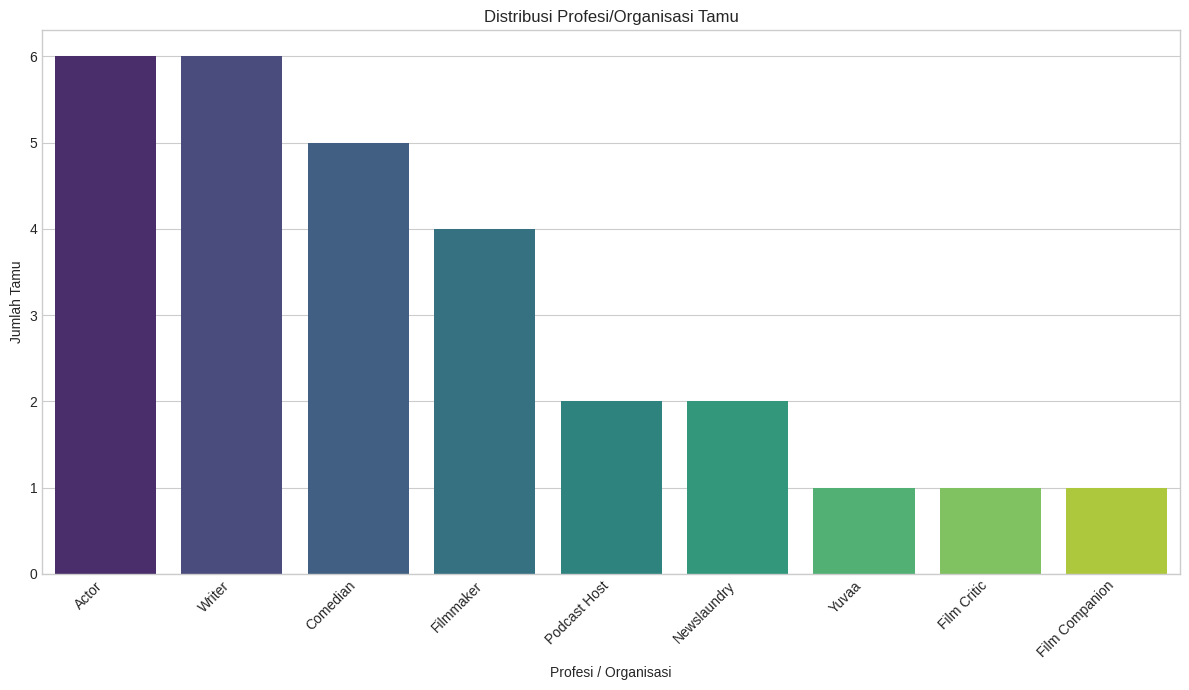

In [11]:
if 'guest_profession_or_org' in guests_df.columns:
    plt.figure(figsize=(12, 7))
    profession_counts = guests_df['guest_profession_or_org'].value_counts()
    
    # Jika jumlah kategori terlalu banyak, tampilkan N teratas saja
    top_n_professions = 15
    if len(profession_counts) > top_n_professions:
        profession_counts = profession_counts.head(top_n_professions)
        plt.title(f'Top {top_n_professions} Distribusi Profesi/Organisasi Tamu')
    else:
        plt.title('Distribusi Profesi/Organisasi Tamu')

    sns.barplot(x=profession_counts.index, y=profession_counts.values, palette="viridis")
    plt.xlabel('Profesi / Organisasi')
    plt.ylabel('Jumlah Tamu')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout() # Menyesuaikan layout agar label tidak terpotong
    plt.show()
else:
    print("Kolom 'guest_profession_or_org' tidak ditemukan.")

#### Books Data

**Distribusi Fitur Numerik**

Sebaran `pageCount` dan `averageRating`

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


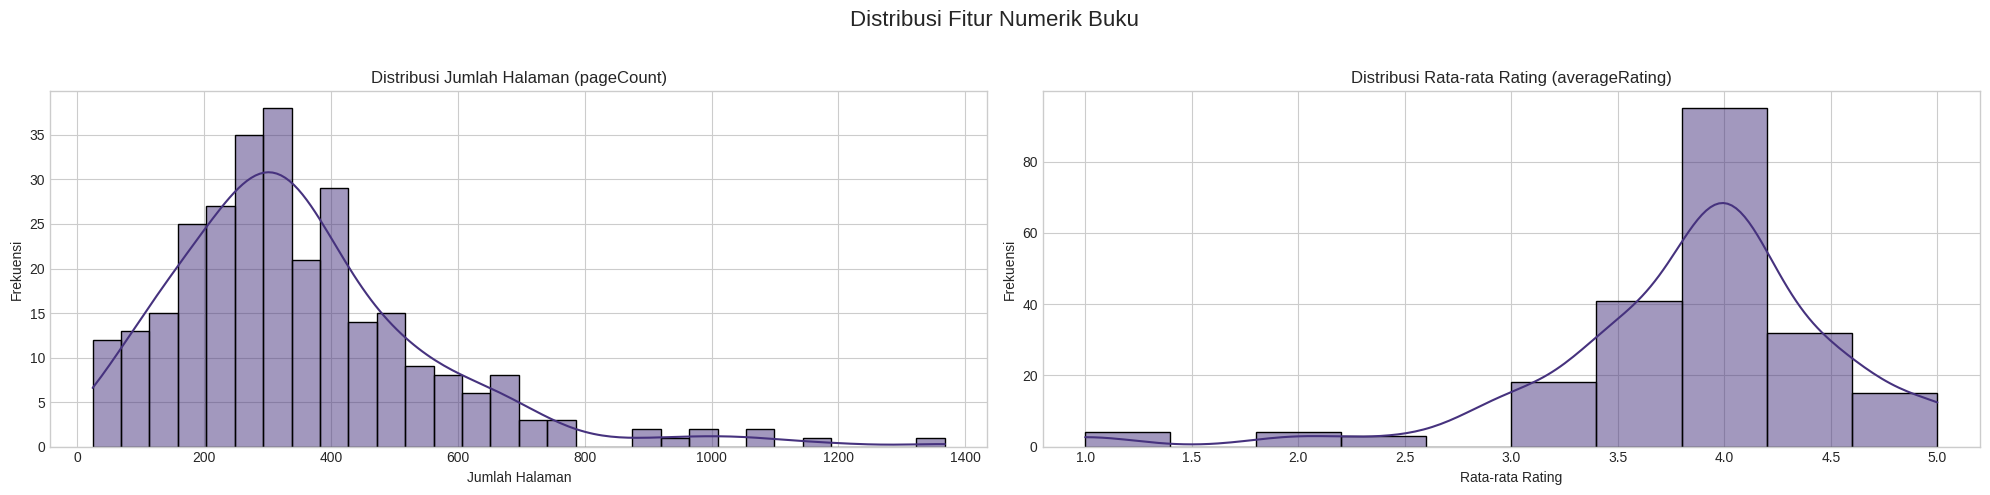

In [12]:
if not books_df.empty and all(col in books_df.columns for col in ['pageCount', 'averageRating']):
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    fig.suptitle('Distribusi Fitur Numerik Buku', fontsize=16)

    sns.histplot(books_df['pageCount'], kde=True, ax=axes[0], bins=30)
    axes[0].set_title('Distribusi Jumlah Halaman (pageCount)')
    axes[0].set_xlabel('Jumlah Halaman')
    axes[0].set_ylabel('Frekuensi')

    sns.histplot(books_df['averageRating'], kde=True, ax=axes[1], bins=10)
    axes[1].set_title('Distribusi Rata-rata Rating (averageRating)')
    axes[1].set_xlabel('Rata-rata Rating')
    axes[1].set_ylabel('Frekuensi')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
else:
    print("Kolom numerik 'pageCount', 'averageRating', atau 'ratingsCount' tidak ditemukan atau DataFrame kosong.")

Heatmap fitur numerik

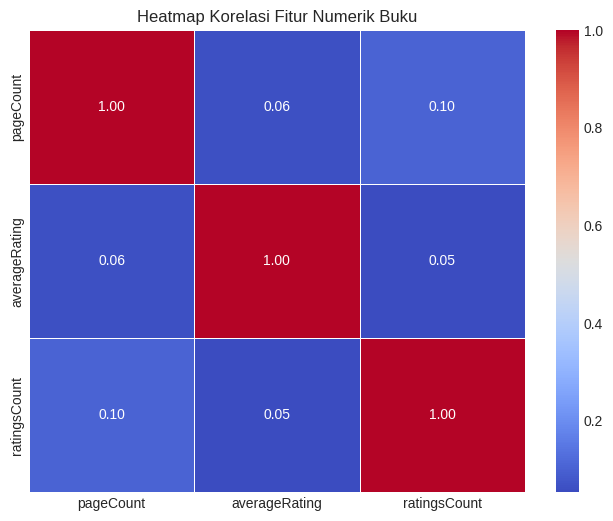

In [13]:
if not books_df.empty and all(col in books_df.columns for col in ['pageCount', 'averageRating', 'ratingsCount']):
    numerical_features = books_df[['pageCount', 'averageRating', 'ratingsCount']]

    plt.figure(figsize=(8, 6))
    correlation_matrix = numerical_features.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Heatmap Korelasi Fitur Numerik Buku')
    plt.show()
else:
    print("Tidak semua kolom numerik ('pageCount', 'averageRating', 'ratingsCount') ditemukan untuk analisis korelasi.")

**Distribusi Fitur Kategorik**

Kategori Buku Terpopuler

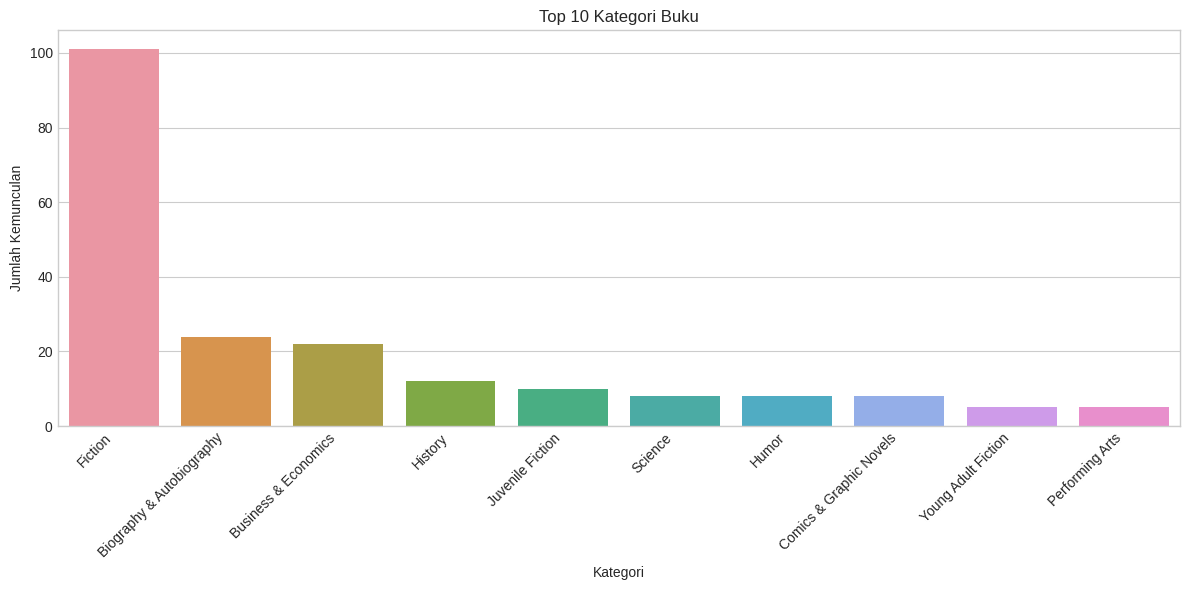

In [14]:
if not books_df.empty and 'categories' in books_df.columns:
    try:
        # Fungsi untuk mem-parsing string list dan menghitung frekuensi kategori
        def get_category_counts(series):
            from collections import Counter
            import ast # Untuk evaluasi string list literal dengan aman

            all_categories = []
            for item_list_str in series.dropna():
                try:
                    # Coba evaluasi sebagai Python literal jika formatnya ['Cat A', 'Cat B']
                    # Ini bisa berisiko jika string tidak terformat dengan baik.
                    # Pertimbangkan regex jika format lebih bebas.
                    item_list = ast.literal_eval(item_list_str)
                    if isinstance(item_list, list):
                        all_categories.extend([cat.strip() for cat in item_list])
                    elif isinstance(item_list, str): # Jika hanya satu kategori tanpa list
                         all_categories.append(item_list.strip())
                except (ValueError, SyntaxError):
                    # Jika gagal di-eval, anggap sebagai satu kategori string biasa
                    # atau pisahkan berdasarkan koma jika ada
                    all_categories.extend([cat.strip() for cat in item_list_str.split(',')])
            return Counter(all_categories)

        category_counts = get_category_counts(books_df['categories'])
        if category_counts:
            top_categories = pd.Series(category_counts).sort_values(ascending=False).head(10)

            plt.figure(figsize=(12, 6))
            sns.barplot(x=top_categories.index, y=top_categories.values)
            plt.title('Top 10 Kategori Buku')
            plt.xlabel('Kategori')
            plt.ylabel('Jumlah Kemunculan')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("Tidak ada data kategori yang bisa diproses.")
    except Exception as e:
        print(f"Error saat memproses kategori: {e}. Pastikan format kolom 'categories' sesuai.")
else:
    print("Kolom 'categories' tidak ditemukan atau DataFrame kosong.")


Penulis Buku Terpopuler

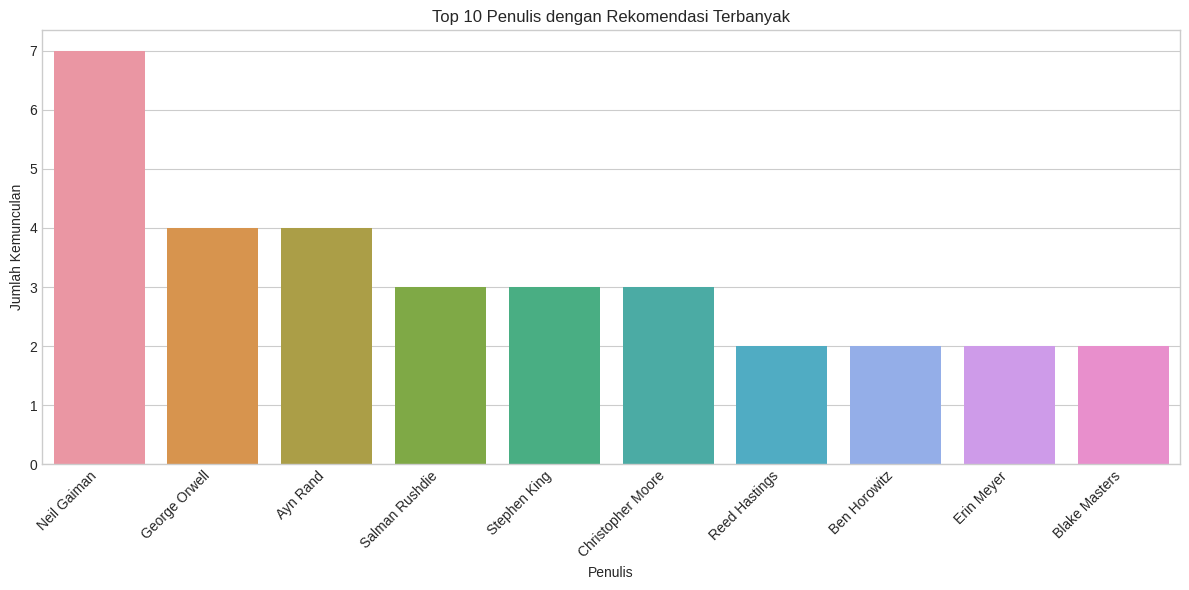

In [15]:
if not books_df.empty and 'authors' in books_df.columns:
    try:
        # Fungsi parsing bisa disamakan dengan kategori atau disesuaikan
        author_counts = get_category_counts(books_df['authors']) # Menggunakan fungsi yang sama
        if author_counts:
            top_authors = pd.Series(author_counts).sort_values(ascending=False).head(10)
            if 'Unknown' in top_authors.index and len(top_authors) > 1: # Jangan hanya tampilkan 'Unknown'
                top_authors = top_authors[top_authors.index != 'Unknown'].head(10)


            plt.figure(figsize=(12, 6))
            sns.barplot(x=top_authors.index, y=top_authors.values)
            plt.title('Top 10 Penulis dengan Rekomendasi Terbanyak')
            plt.xlabel('Penulis')
            plt.ylabel('Jumlah Kemunculan')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("Tidak ada data penulis yang bisa diproses.")
    except Exception as e:
        print(f"Error saat memproses penulis: {e}. Pastikan format kolom 'authors' sesuai.")

else:
    print("Kolom 'authors' tidak ditemukan atau DataFrame kosong.")


#### Recommendations Data

Distribusi Rekomendasi per Tamu

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


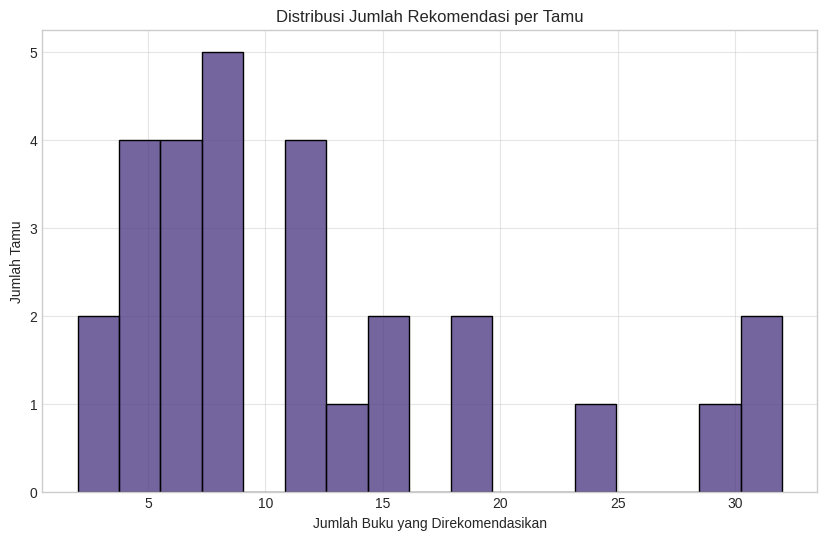

In [16]:
recommendations_per_guest = recommendations_df['guest_id'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(recommendations_per_guest, bins=max(10, min(30, recommendations_per_guest.nunique())), kde=False) # Sesuaikan bins
plt.title('Distribusi Jumlah Rekomendasi per Tamu')
plt.xlabel('Jumlah Buku yang Direkomendasikan')
plt.ylabel('Jumlah Tamu')
# Pertimbangkan skala log pada sumbu y jika distribusinya sangat miring
# plt.yscale('log')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()


Tamu dengan Rekomendasi Terbanyak

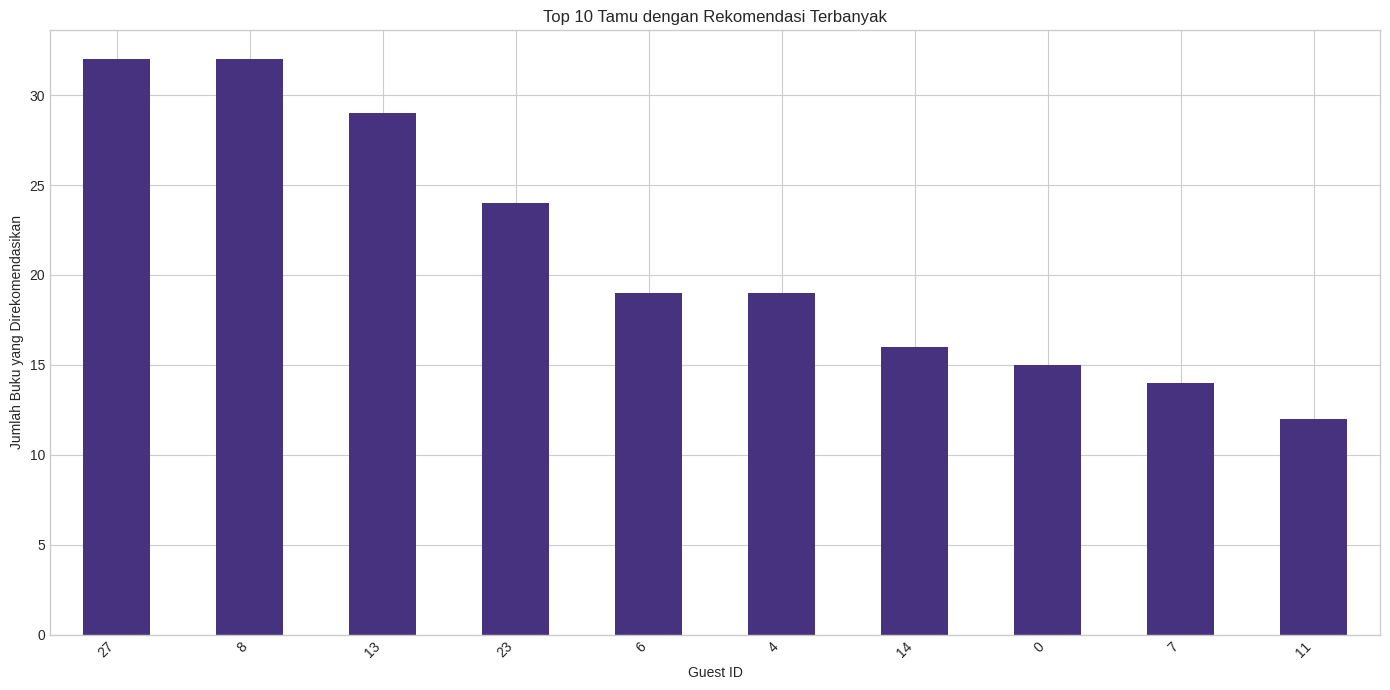

In [17]:
top_n_guests = 10
if len(recommendations_per_guest) > 0:
    plt.figure(figsize=(14, 7))
    recommendations_per_guest.head(top_n_guests).plot(kind='bar')
    plt.xlabel('Guest ID')

    plt.title(f'Top {top_n_guests} Tamu dengan Rekomendasi Terbanyak')
    plt.ylabel('Jumlah Buku yang Direkomendasikan')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada data rekomendasi per tamu untuk ditampilkan pada bar chart.")

Top 1 tamu (3.6%) menyumbang 9.55% dari total rekomendasi.
Top 2 tamu (7.1%) menyumbang 19.10% dari total rekomendasi.
Top 5 tamu (17.9%) menyumbang 40.60% dari total rekomendasi.
Top 10 tamu (35.7%) menyumbang 63.28% dari total rekomendasi.


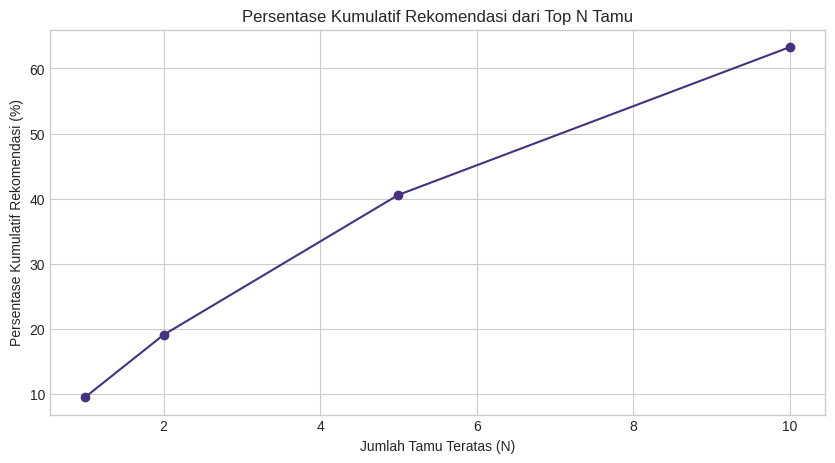

In [18]:
total_recommendations = len(recommendations_df)
if total_recommendations > 0 and len(recommendations_per_guest) > 0:
    cumulative_percentage = []
    num_top_guests_to_check = [1, 5, 10, int(len(recommendations_per_guest) * 0.1), int(len(recommendations_per_guest) * 0.2)] # Cek top 1, 5, 10, 10%, 20% tamu
    num_top_guests_to_check = sorted(list(set([n for n in num_top_guests_to_check if n > 0 and n <= len(recommendations_per_guest)]))) # Pastikan valid

    for n in num_top_guests_to_check:
        recs_by_top_n = recommendations_per_guest.head(n).sum()
        percentage = (recs_by_top_n / total_recommendations) * 100
        cumulative_percentage.append(percentage)
        print(f"Top {n} tamu ({n/len(recommendations_per_guest)*100:.1f}%) menyumbang {percentage:.2f}% dari total rekomendasi.")

    if cumulative_percentage:
        plt.figure(figsize=(10, 5))
        plt.plot(num_top_guests_to_check, cumulative_percentage, marker='o')
        plt.title('Persentase Kumulatif Rekomendasi dari Top N Tamu')
        plt.xlabel('Jumlah Tamu Teratas (N)')
        plt.ylabel('Persentase Kumulatif Rekomendasi (%)')
        plt.grid(True)
        plt.show()
else:
    print("Tidak dapat menghitung persentase kumulatif, total rekomendasi atau jumlah tamu unik adalah nol.")

## Data Preparation

Proses persiapan data dilakukan untuk memastikan data bersih, konsisten, dan dalam format yang sesuai untuk pemodelan.

## Missing Values Treatment

- Untuk kolom tekstual di books_df (book_description, description, synopsis, categories, authors, publisher, language, publishedDate): Nilai NaN diisi dengan string kosong ('') atau nilai placeholder seperti 'Unknown'. Ini dilakukan agar operasi string berikutnya tidak error.
- Untuk kolom numerik di books_df (averageRating, pageCount): Nilai NaN diisi dengan nilai median dari kolom tersebut. Median dipilih karena lebih robust terhadap outlier dibandingkan mean. ratingsCount diisi dengan 0.
- Untuk kolom tekstual di guests_df (guest_profession_or_org, guest_info): Nilai NaN diisi dengan 'Unknown' atau string kosong.
- Untuk recommendations_df: Baris dengan guest_id atau book_id yang hilang (jika ada) akan dihapus karena merupakan informasi krusial untuk interaksi.

In [19]:
if not books_df.empty:
    books_df['book_description_from_chalchitra'] = books_df['book_description_from_chalchitra'].fillna('')
    # For other text columns in books_df (assuming they exist based on previous context)
    books_df['description'] = books_df['description'].fillna('')
    books_df['synopsis'] = books_df['synopsis'].fillna('')
    books_df['categories'] = books_df['categories'].fillna('Unknown')
    books_df['authors'] = books_df['authors'].fillna('Unknown')
    books_df['publisher'] = books_df['publisher'].fillna('Unknown')

    if 'averageRating' in books_df.columns:
        median_avg_rating = books_df['averageRating'].median() # Calculate median once
        books_df['averageRating'] = books_df['averageRating'].fillna(median_avg_rating)
    if 'ratingsCount' in books_df.columns:
        books_df['ratingsCount'] = books_df['ratingsCount'].fillna(0) # Atau median
    if 'pageCount' in books_df.columns:
        median_page_count = books_df['pageCount'].median() # Calculate median once
        books_df['pageCount'] = books_df['pageCount'].fillna(median_page_count)

if not guests_df.empty:
    guests_df['guest_profession_or_org'] = guests_df['guest_profession_or_org'].fillna('Unknown')
    guests_df['guest_info'] = guests_df['guest_info'].fillna('')

if not recommendations_df.empty:
    if recommendations_df.isnull().values.any():
        print("Menghapus baris dengan NaN di recommendations_df...")
        recommendations_df.dropna(inplace=True)
        
print("Fillna applied using for missing values.")

Fillna applied using for missing values.


#### Feature Engineering

In [20]:
if not books_df.empty:
    cols_for_content = {
        'book_name': 'text',
        'book_description_from_chalchitra': 'text',
        'authors': 'list_like_text', 
        'categories': 'list_like_text',
        'description': 'text',
        'synopsis': 'text',
        'publisher': 'text', 
        'language': 'text'  
    }

    books_df['content_features'] = ''

    for col, col_type in cols_for_content.items():
        if col in books_df.columns:
            # Isi NaN dengan string kosong untuk kolom teks atau 'Unknown' untuk kategori jika perlu
            # Untuk kolom yang akan diproses, pastikan semuanya string dulu
            series_to_process = books_df[col].fillna('').astype(str)

            if col_type == 'list_like_text':
                # Membersihkan karakter list dan tanda kutip dari string
                # Ini adalah asumsi umum, mungkin perlu disesuaikan jika format list berbeda
                # Contoh: "['Author A', 'Author B']" -> "Author A Author B"
                # Contoh: "['Fiction']" -> "Fiction"
                processed_series = series_to_process.str.replace(r"[\[\]',]", '', regex=True)
                # Hapus spasi berlebih yang mungkin muncul setelah replace
                processed_series = processed_series.str.replace(r'\s+', ' ', regex=True).str.strip()
                books_df['content_features'] += processed_series + ' '
            else: # col_type == 'text'
                books_df['content_features'] += series_to_process + ' '
        else:
            print(f"Peringatan: Kolom '{col}' tidak ditemukan di books_df untuk feature engineering.")

    # Hapus spasi berlebih di awal/akhir dan ubah ke lowercase
    books_df['content_features'] = books_df['content_features'].str.strip().str.lower()
    # Hapus spasi ganda yang mungkin terbentuk
    books_df['content_features'] = books_df['content_features'].str.replace(r'\s+', ' ', regex=True)

    print("\nContoh content_features setelah perbaikan:")
    if 'content_features' in books_df.columns and not books_df.empty:
        print(books_df[['book_name', 'content_features']].head())
    else:
        print("Kolom 'content_features' tidak dapat dibuat atau books_df kosong.")


Contoh content_features setelah perbaikan:
                             book_name  \
0  Charles Laughton: A Difficult Actor   
1                   Gone with the Wind   
2                             Hayvadan   
3               The London Jungle Book   
4           The Private Life of Plants   

                                    content_features  
0  charles laughton: a difficult actor this is th...  
1  gone with the wind a historical novel by marga...  
2  hayvadan it is based on kathasaritsagara and t...  
3  the london jungle book a visual travelogue by ...  
4  the private life of plants this book reveals h...  


In [21]:
books_df

,book_id,book_name,book_description_from_chalchitra,authors,publisher,publishedDate,pageCount,categories,averageRating,ratingsCount,language,description,synopsis,content_features
0,0,Charles Laughton: A Difficult Actor,This is the fullest biography yet on the actor...,['Simon Callow'],Fromm International,1997,318.0,['Biography & Autobiography'],4.0,0.0,en,,,charles laughton: a difficult actor this is th...
1,1,Gone with the Wind,A historical novel by Margaret Mitchell.,['Margaret Mitchell'],Random House,2020-01-02,1072.0,['Fiction'],4.5,5.0,en,"'My dear, I don't give a damn.' Margaret Mitch...","'My dear, I don't give a damn.'\n\nMargaret Mi...",gone with the wind a historical novel by marga...
2,2,Hayvadan,It is based on Kathasaritsagara and Thomas Man...,['Girish Karnad'],Radhakrishna Prakashan,2021-07-29,132.0,Unknown,4.0,0.0,hi,,,hayvadan it is based on kathasaritsagara and t...
3,3,The London Jungle Book,A visual travelogue by Bhajju Shyam,"['Bhajju Shyam', 'Sirish Rao', 'Gita Wolf-Samp...",Tara Publishing,2004,48.0,['Art'],5.0,1.0,en,"Bhajju Shyam, of the Gond tribe of central Ind...",“A beautiful book. I would like to give it to ...,the london jungle book a visual travelogue by ...
4,4,The Private Life of Plants,This book reveals hidden events and phenomena ...,['David Attenborough'],Unknown,1995,320.0,['Botany'],4.0,3.0,en,"Without plants, there would be no food, no ani...","Without plants, there would be no food, no ani...",the private life of plants this book reveals h...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,314,Anathem,It is a science fiction novel by American writ...,['Neal Stephenson'],Harper Collins,2009-08-25,1008.0,['Fiction'],4.0,175.0,en,"For ten years Fraa Erasmas, a young avout, has...","For ten years Fraa Erasmas, a young avout, ha...",anathem it is a science fiction novel by ameri...
315,315,Cloud Atlas,"It is a work combining metafiction, historical...",['David Mitchell'],Vintage Canada,2010-07-16,528.0,['Fiction'],4.0,508.0,en,By the New York Times bestselling author of Th...,By the New York Times bestselling author of Th...,cloud atlas it is a work combining metafiction...
316,316,Watchmen,It is an American comic book maxiseries by Ala...,"['Alan Moore', 'Dave Gibbons', 'John Higgins']",Dc Comics,1987,413.0,['Comics & Graphic Novels'],4.0,3898.0,en,As former members of a disbanded group of supe...,"""Following two generations of masked superhero...",watchmen it is an american comic book maxiseri...
317,317,Matterhorn,An incredible publishing story written over th...,['Karl Marlantes'],"Grove/Atlantic, Inc.",2010-04-01,592.0,['Fiction'],4.5,93.0,en,"Intense, powerful, and compelling, Matterhorn ...","Intense, powerful, and compelling, Matterhorn ...",matterhorn an incredible publishing story writ...


#### Add Implicit Rating

In [22]:
if not recommendations_df.empty:
    recommendations_df['rating'] = 1

recommendations_df

,book_id,guest_id,rating
0,0,0,1
1,1,0,1
2,2,0,1
3,3,0,1
4,4,0,1
...,...,...,...
330,91,27,1
331,315,27,1
332,316,27,1
333,317,27,1


## Modelling

### Content-Based Filtering

#### TF-IDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim_books = None
book_indices = None

if not books_df.empty and 'content_features' in books_df.columns and not books_df['content_features'].dropna().empty:
    print("Membangun model Content-Based Filtering...")
    try:
        tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85, min_df=2)
        tfidf_matrix = tfidf_vectorizer.fit_transform(books_df['content_features'].dropna())

        if tfidf_matrix.shape[0] > 0:
            cosine_sim_books = cosine_similarity(tfidf_matrix, tfidf_matrix)
            books_df_for_indices = books_df.dropna(subset=['book_name', 'content_features']).reset_index(drop=True)
            if not books_df_for_indices.empty:
                 book_indices = pd.Series(books_df_for_indices.index, index=books_df_for_indices['book_name']).drop_duplicates()
            else:
                print("Tidak ada buku yang valid untuk membuat book_indices pada Content-Based.")
        else:
            print("Matriks TF-IDF kosong, tidak bisa menghitung cosine similarity.")
            
    except Exception as e:
        print(f"Error saat membangun model Content-Based: {e}")
else:
    print("Skipping Content-Based Filtering: books_df tidak siap atau kolom 'content_features' kosong/NaN semua.")

Membangun model Content-Based Filtering...


#### Recommendation Method

In [24]:
def get_content_based_recommendations(book_title, num_recommendations=5):
    """Memberikan rekomendasi buku berdasarkan kemiripan konten."""
    if cosine_sim_books is None or book_indices is None or book_indices.empty:
        return "Model Content-Based belum siap atau tidak ada data."
    if book_title not in book_indices:
        # Coba cari judul yang mirip jika ada typo kecil (opsional, bisa kompleks)
        # from difflib import get_close_matches
        # close_matches = get_close_matches(book_title, book_indices.index)
        # if close_matches:
        #     return f"Buku '{book_title}' tidak ditemukan. Mungkin maksud Anda: {close_matches[0]}?"
        return f"Buku '{book_title}' tidak ditemukan dalam indeks buku."

    idx = book_indices[book_title]
    
    # Pastikan idx valid untuk cosine_sim_books
    if idx >= cosine_sim_books.shape[0]:
        return f"Indeks buku '{book_title}' di luar jangkauan matriks similaritas."

    sim_scores = list(enumerate(cosine_sim_books[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    book_rec_indices = [i[0] for i in sim_scores]

    # Menggunakan DataFrame yang digunakan untuk membuat book_indices
    # (books_df_for_indices dari blok training model CB)
    # Jika book_indices dibuat dari books_df asli, maka gunakan books_df.iloc
    # Ini ASUMSI book_indices dibuat dari books_df_for_indices yang sudah di-reset indexnya
    if 'books_df_for_indices' in globals() and not books_df_for_indices.empty:
         recommended_books = books_df_for_indices['book_name'].iloc[book_rec_indices]
    elif not books_df.empty: # Fallback jika books_df_for_indices tidak terdefinisi dengan baik
        # Ini mungkin tidak akurat jika ada dropna pada content_features
        print("Peringatan: Menggunakan books_df.iloc untuk rekomendasi CB, indeks mungkin tidak sinkron jika ada NaN di content_features.")
        # Pastikan book_rec_indices valid untuk books_df
        valid_rec_indices = [i for i in book_rec_indices if i < len(books_df)]
        recommended_books = books_df['book_name'].iloc[valid_rec_indices]
    else:
        return "DataFrame buku tidak tersedia untuk mengambil nama buku."

    return recommended_books

#### Example

In [25]:
# Contoh penggunaan Content-Based Recommendation
if not books_df.empty and 'book_name' in books_df.columns and len(books_df['book_name'].dropna()) > 1 and book_indices is not None and not book_indices.empty:
    try:
        sample_book_title_cb = book_indices.index.to_series().sample(1).iloc[0]
        print(f"\n--- Rekomendasi Content-Based untuk '{sample_book_title_cb}' ---")
        recommendations_cb = get_content_based_recommendations(sample_book_title_cb, num_recommendations=3)
        if isinstance(recommendations_cb, str):
             print(recommendations_cb)
        elif not recommendations_cb.empty:
            print(recommendations_cb)
        else:
            print("Tidak ada rekomendasi content-based yang dapat dibuat.")
    except Exception as e:
        print(f"Error saat mengambil contoh rekomendasi Content-Based: {e}")
else:
    print("Skipping contoh Content-Based: 'book_name' column missing, tidak cukup buku, atau model belum siap.")



--- Rekomendasi Content-Based untuk 'The Complete Hitchiker Series' ---
189    Pandeymonium: Piyush Pandey On Advertising
195                          Bill Bernbach's Book
194                    Hey, Whipple, Squeeze This
Name: book_name, dtype: object


### Collaborative Filtering

CF > Model-Based > Matrix Factorization

#### Single Value Decomposition (SVD)

In [26]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

SURPRISE_AVAILABLE = True
algo_svd = None

if SURPRISE_AVAILABLE and not recommendations_df.empty and \
   all(col in recommendations_df.columns for col in ['guest_id', 'book_id', 'rating']) and \
   len(recommendations_df) > 1: 
    print("\nMembangun model Collaborative Filtering (SVD)...")
    try:
        reader = Reader(rating_scale=(0, 1))
        data_cf = Dataset.load_from_df(recommendations_df[['guest_id', 'book_id', 'rating']], reader)
        trainset_full = data_cf.build_full_trainset()

        algo_svd = SVD(n_factors=50, n_epochs=20, random_state=42, verbose=False)
        algo_svd.fit(trainset_full)
        print("Model SVD berhasil dilatih.")
    except Exception as e:
        print(f"Error saat membangun model SVD: {e}")
        algo_svd = None 
else:
    if SURPRISE_AVAILABLE:
        print("Skipping Collaborative Filtering: recommendations_df tidak siap, kosong, atau kurang dari 2 interaksi.")


Membangun model Collaborative Filtering (SVD)...
Model SVD berhasil dilatih.


#### Recommendation Method

In [27]:
def get_collaborative_filtering_recommendations(guest_id_input, algo, n_recs=5):
    """Memberikan rekomendasi buku untuk seorang tamu menggunakan model CF."""
    if algo is None:
        return "Model Collaborative Filtering belum siap."
    if not 'book_id' in recommendations_df or not 'guest_id' in recommendations_df:
        return "Kolom 'book_id' atau 'guest_id' tidak ada di recommendations_df."

    try:
        # Konversi guest_id_input ke tipe data yang sama dengan di trainset (biasanya string atau int)
        # algo.trainset.to_inner_uid(guest_id_input) # Ini akan error jika guest_id tidak ada
        # Cek dulu apakah guest_id ada di trainset
        try:
            _ = algo.trainset.to_inner_uid(guest_id_input)
        except ValueError:
            return f"Guest ID '{guest_id_input}' tidak ditemukan dalam training set model CF."

        all_book_ids_in_model = [algo.trainset.to_raw_iid(inner_id) for inner_id in algo.trainset.all_items()]
        guest_recommended_books_raw_ids = recommendations_df[recommendations_df['guest_id'] == guest_id_input]['book_id'].unique()

        books_to_predict = np.setdiff1d(all_book_ids_in_model, guest_recommended_books_raw_ids)

        if not books_to_predict.any():
            return "Tamu ini sudah merekomendasikan semua buku yang ada di model, atau tidak ada buku baru untuk direkomendasikan."

        test_data_for_guest = [(guest_id_input, book_id, 0) for book_id in books_to_predict]
        if not test_data_for_guest: # Jika tidak ada buku lagi untuk diprediksi setelah filtering
            return "Tidak ada buku lagi yang dapat diprediksi untuk tamu ini."

        predictions = algo.test(test_data_for_guest)
        predictions.sort(key=lambda x: x.est, reverse=True)

        recommended_book_ids = [pred.iid for pred in predictions[:n_recs]]

        if not books_df.empty and 'book_id' in books_df.columns and 'book_name' in books_df.columns:
            recommended_book_names = books_df[books_df['book_id'].isin(recommended_book_ids)][['book_id', 'book_name']]
            # Urutkan berdasarkan urutan di recommended_book_ids
            recommended_book_names = recommended_book_names.set_index('book_id').loc[recommended_book_ids].reset_index()['book_name']
            return recommended_book_names
        else:
            return pd.Series(recommended_book_ids, name="book_id") # Kembalikan ID jika books_df tidak tersedia
    except Exception as e:
        return f"Error saat mendapatkan rekomendasi CF: {e}"

#### Example

In [28]:
if algo_svd is not None and not guests_df.empty and 'guest_id' in guests_df.columns and \
   not recommendations_df.empty and 'guest_id' in recommendations_df.columns and \
   len(recommendations_df['guest_id'].unique()) > 0:
    try:
        # Dapatkan semua inner user IDs dari trainset
        all_inner_user_ids = list(algo_svd.trainset.all_users())

        if all_inner_user_ids:
            # Konversi inner user IDs kembali ke raw user IDs
            available_guest_ids_in_model = [algo_svd.trainset.to_raw_uid(inner_id) for inner_id in all_inner_user_ids]

            if available_guest_ids_in_model:
                sample_guest_id_cf = np.random.choice(available_guest_ids_in_model)
                print(f"\n--- Rekomendasi Collaborative Filtering (SVD) untuk Guest ID '{sample_guest_id_cf}' ---")
                recommendations_svd = get_collaborative_filtering_recommendations(sample_guest_id_cf, algo_svd, n_recs=3)
                if isinstance(recommendations_svd, str):
                    print(recommendations_svd)
                elif recommendations_svd is not None and not recommendations_svd.empty: # Tambahkan pengecekan None
                    print(recommendations_svd)
                else:
                    print("Tidak ada rekomendasi collaborative filtering yang dapat dibuat (kemungkinan hasil kosong atau None).")
            else:
                print("Tidak ada guest ID mentah yang valid di model CF setelah konversi.")
        else:
            print("Tidak ada user ID (inner) di model CF untuk dijadikan sampel.")
    except Exception as e:
        print(f"Error saat mengambil contoh rekomendasi Collaborative Filtering: {e}")
else:
    print("Skipping contoh Collaborative Filtering: model SVD belum siap atau data tidak cukup.")


--- Rekomendasi Collaborative Filtering (SVD) untuk Guest ID '24' ---
0    Orson Welles: The Road to Xanadu
1                  The Scenes We Made
2                Caesar and Cleopatra
Name: book_name, dtype: object


## Evaluation

In [29]:
if SURPRISE_AVAILABLE and algo_svd is not None and not recommendations_df.empty and \
   all(col in recommendations_df.columns for col in ['guest_id', 'book_id', 'rating']) and \
   len(recommendations_df) > 1:
    try:
        reader_eval = Reader(rating_scale=(0, 1))
        data_cf_eval = Dataset.load_from_df(recommendations_df[['guest_id', 'book_id', 'rating']], reader_eval)
        algo_svd_eval = SVD(n_factors=50, n_epochs=20, random_state=42, verbose=False)
        cv_results = cross_validate(algo_svd_eval, data_cf_eval, measures=['RMSE', 'MAE'], cv=3, verbose=False)
        print("\nHasil Cross-Validation SVD:")
        print(f"Rata-rata RMSE: {cv_results['test_rmse'].mean():.4f}")
        print(f"Rata-rata MAE: {cv_results['test_mae'].mean():.4f}")
    except Exception as e:
        print(f"Error saat melakukan cross-validation: {e}")
else:
    if SURPRISE_AVAILABLE:
        print("Skipping Evaluasi CF: model SVD belum siap atau data tidak cukup.")


Hasil Cross-Validation SVD:
Rata-rata RMSE: 0.0136
Rata-rata MAE: 0.0053
